In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

In [68]:
image = cv2.imread("../../images/coins_th.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

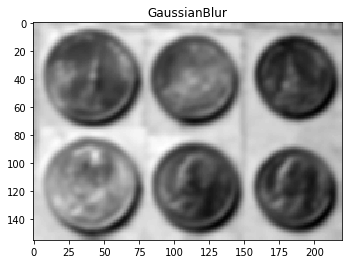

In [51]:
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plt.title('GaussianBlur')
plt.imshow(blurred,cmap='gray')

### Step1 Edge Detection

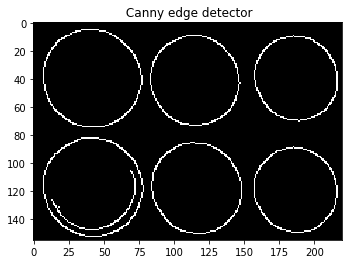

In [52]:
edged = cv2.Canny(blurred, 30, 150)
plt.title(' Canny edge detector')
plt.imshow(edged,cmap='gray')

### Step2 Find Contour

In [53]:
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("I count {} coins in this image".format(len(cnts)))

I count 6 coins in this image


### Step3 Draw Contour

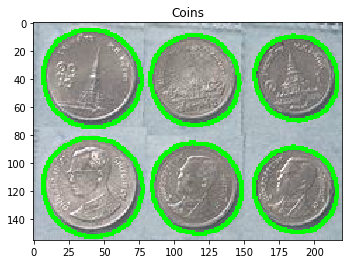

In [54]:
coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
plt.title('Coins')
plt.imshow(coins,cmap='gray')

In [55]:
coin_extract = []
coin_extract_mask = []

for (i, c) in enumerate(cnts):

    (x, y, w, h) = cv2.boundingRect(c)

    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
    coin_extract.append(coin)

    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    
    coin_extract_mask.append(cv2.bitwise_and(coin, coin, mask = mask))


Coin #1
Coin #2
Coin #3
Coin #4
Coin #5
Coin #6


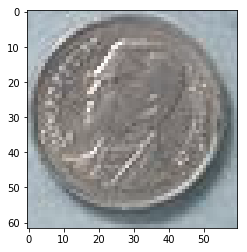

In [56]:
plt.imshow(coin_extract[0],cmap='gray')

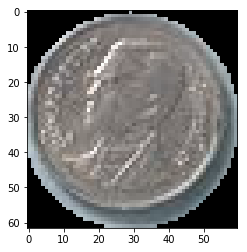

In [57]:
plt.imshow(coin_extract_mask[0],cmap='gray')

### CHT

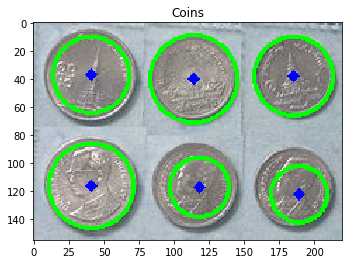

In [84]:
src_image = cv2.imread("../../images/coins_th.jpg")


gray     = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)
blurred  = cv2.GaussianBlur(gray, (11,11), 0)
circles  = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 70, param1=2, param2=30, minRadius=10, maxRadius=90)


for i in circles[0,:]:
    #draw the outer circle
    cv2.circle(src_image, (i[0], i[1]), i[2], (0,255,0), 2)
    
    #draw the center of the circle
    cv2.circle(src_image, (i[0],i[1]), 2, (0,0,255), 3)

plt.figure("Hough Circle Transform")    
plt.gray()    
plt.imshow(src_image)
plt.title('Coins')
plt.show()

### Conclusion

Approach 1


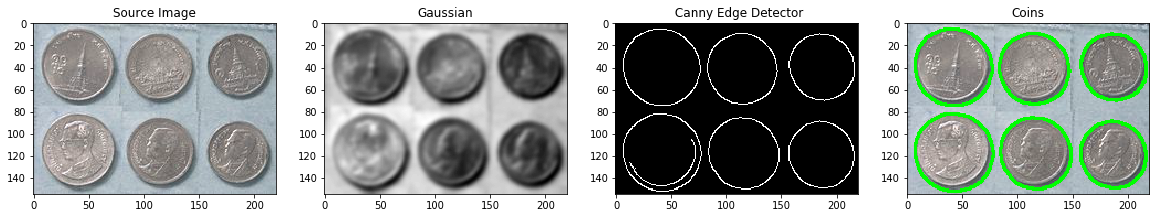

In [83]:
image = cv2.imread("../../images/coins_th.jpg")
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(141)
plt.title('Source Image')
plt.imshow(image,cmap='gray')

ax = fig.add_subplot(142)
plt.title('Gaussian')
plt.imshow(blurred,cmap='gray')

ax = fig.add_subplot(143)
plt.title(' Canny Edge Detector')
plt.imshow(edged,cmap='gray')

ax = fig.add_subplot(144)
plt.title('Coins')
plt.imshow(coins,cmap='gray')

fig.tight_layout

print('Approach 1')

In [60]:
print("total coins : ",len(cnts))

total coins :  6


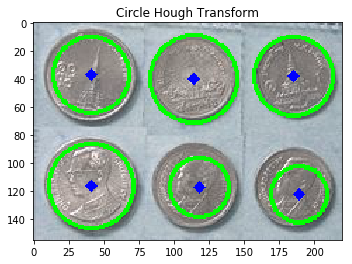

In [86]:
plt.title("Circle Hough Transform")      
plt.imshow(src_image,cmap='gray')